**Importing Required Libraries**

In [1]:
from sqlalchemy import create_engine
import pandas as pd

**Connecting to the DWH And Loading Tables to a DF**

In [2]:
#connecting to the DWH
server = 'DESKTOP-R753PEO'
database = 'Learning_System_datawarehouse'

engine = create_engine(f'mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes')
conn = engine.connect()

In [3]:
#loading the Fact table
userProgressDF = pd.read_sql("SELECT * FROM FactUserProgress", conn)
userProgressDF

,FactID,UserID,CourseID,ModuleID,LessonID,QuizID,AssignmentID,ProgressStatus,EvaluationScore,CertificateIssued,EvaluationID,CreatedAt
0,1,1,1,1,1,1,1,Completed,85.0,True,1,2024-10-22 16:58:39.700
1,2,1,1,1,1,1,2,Completed,85.0,True,1,2024-10-22 16:58:39.700
2,3,1,1,1,1,2,1,Completed,85.0,True,1,2024-10-22 16:58:39.700
3,4,1,1,1,1,2,2,Completed,85.0,True,1,2024-10-22 16:58:39.700
4,5,1,1,1,2,1,1,Completed,85.0,True,1,2024-10-22 16:58:39.700
...,...,...,...,...,...,...,...,...,...,...,...,...
483,484,12,17,50,100,99,100,Completed,85.5,True,12,2024-10-22 16:58:39.700
484,485,12,17,50,100,100,99,In Progress,85.5,True,12,2024-10-22 16:58:39.700
485,486,12,17,50,100,100,99,Completed,85.5,True,12,2024-10-22 16:58:39.700
486,487,12,17,50,100,100,100,In Progress,85.5,True,12,2024-10-22 16:58:39.700


In [4]:
#Loading the Dimension Tables
usersDF = pd.read_sql("SELECT * FROM dimUsers", conn)
coursesDF = pd.read_sql("SELECT * FROM DimCourse", conn)
moduleDF = pd.read_sql("SELECT * FROM DimModule", conn)
lessonsDF = pd.read_sql("SELECT * FROM DimLesson", conn)
quizDF = pd.read_sql("SELECT * FROM DimQuiz", conn)
assignmentsDF = pd.read_sql("SELECT * FROM DimAssignments", conn)
evalResultsDF = pd.read_sql("SELECT * FROM DimEvaluateResult", conn)


**Data Cleaning:**

In [5]:
#checking Nulls in Fact Table
userProgressDF.isnull().sum()

FactID                0
UserID                0
CourseID              0
ModuleID              0
LessonID              0
QuizID                0
AssignmentID          0
ProgressStatus       48
EvaluationScore       0
CertificateIssued     0
EvaluationID          0
CreatedAt             0
dtype: int64

In [6]:
#checking no. of each value for future segmentation
userProgressDF.ProgressStatus.value_counts()

ProgressStatus
Completed      160
In Progress    160
Not Started    120
Name: count, dtype: int64

In [7]:
#Taking a Look at the null values in order to decide if we will replace or drop it
userProgressDF.loc[userProgressDF.ProgressStatus.isnull()].head()

,FactID,UserID,CourseID,ModuleID,LessonID,QuizID,AssignmentID,ProgressStatus,EvaluationScore,CertificateIssued,EvaluationID,CreatedAt
96,97,4,4,10,19,19,19,None,88.0,True,4,2024-10-22 16:58:39.700
97,98,4,4,10,19,19,20,None,88.0,True,4,2024-10-22 16:58:39.700
98,99,4,4,10,19,20,19,None,88.0,True,4,2024-10-22 16:58:39.700
99,100,4,4,10,19,20,20,None,88.0,True,4,2024-10-22 16:58:39.700
100,101,4,4,10,20,19,19,None,88.0,True,4,2024-10-22 16:58:39.700


In [8]:
#fill null values with 'Not Started'
userProgressDF.ProgressStatus.fillna('Not Started', inplace=True)
userProgressDF.isnull().sum()

C:\Users\original\AppData\Local\Temp\ipykernel_12464\2852522809.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  userProgressDF.ProgressStatus.fillna('Not Started', inplace=True)


FactID               0
UserID               0
CourseID             0
ModuleID             0
LessonID             0
QuizID               0
AssignmentID         0
ProgressStatus       0
EvaluationScore      0
CertificateIssued    0
EvaluationID         0
CreatedAt            0
dtype: int64

In [9]:
#Getting Some Statistic Data
print(userProgressDF.describe().round(0))
print(evalResultsDF.describe().round())

       FactID  UserID  CourseID  ModuleID  LessonID  QuizID  AssignmentID  \
count   488.0   488.0     488.0     488.0     488.0   488.0         488.0   
mean    244.0     5.0       9.0      26.0      51.0    51.0          51.0   
min       1.0     1.0       1.0       1.0       1.0     1.0           1.0   
25%     123.0     3.0       5.0      13.0      25.0    25.0          25.0   
50%     244.0     5.0      10.0      28.0      56.0    56.0          56.0   
75%     366.0     8.0      13.0      37.0      74.0    74.0          74.0   
max     488.0    12.0      17.0      50.0     100.0   100.0         100.0   
std     141.0     3.0       5.0      15.0      29.0    29.0          29.0   

       EvaluationScore  EvaluationID                      CreatedAt  
count            488.0         488.0                            488  
mean              83.0           5.0  2024-10-22 16:58:39.700000256  
min               67.0           1.0     2024-10-22 16:58:39.700000  
25%               78.0    

**extracting SQL queries for Future ML Phase**

**1-User Progress Summary:**

In [10]:
#A query to retrieve the overall progress status and evaluation score for each user across different courses and modules to track trends in user performance.
query1 = """
SELECT U.UserID, C.CourseTitle, M.ModuleName, F.EvaluationScore, COUNT(DISTINCT F.LessonID) AS CompletedLessons, SUM(CASE WHEN F.CertificateIssued = 'True' THEN 1 ELSE 0 END) AS CertificatesIssued
FROM 
    FactUserProgress F
JOIN 
    dimUsers U ON F.UserID = U.UserID
JOIN 
    dimCourse C ON F.CourseID = C.CourseID
JOIN 
    dimModule M ON F.ModuleID = M.ModuleID
GROUP BY 
    U.UserID, C.CourseTitle, M.ModuleName,  F.EvaluationScore

ORDER BY U.UserID;
"""
# Execute the query
overallPerformance = pd.read_sql(query1, conn)
overallPerformance    



,UserID,CourseTitle,ModuleName,EvaluationScore,CompletedLessons,CertificatesIssued
0,1,Data Structures,Database Management,85.00,2,8
1,1,Data Structures,Software Engineering,85.00,2,8
2,1,Data Structures,Web Development,85.00,2,8
3,1,Introduction to Programming,Data Structures,85.00,2,8
4,1,Introduction to Programming,Introduction to Computer Science,85.00,2,8
5,1,Introduction to Programming,Programming Basics,85.00,2,8
6,2,Calculus I,Calculus I,90.00,2,16
7,2,Calculus I,Linear Algebra,90.00,2,16
8,2,Calculus I,Statistics,90.00,2,16
9,2,Linear Algebra,Cognitive Psychology,90.00,2,8


**2-Quiz Performance Analysis:**

In [11]:
#Extract details of users' performance in quizzes, for performance prediction and learning analysis.
query2 = """SELECT 
    U.UserID,
    Q.QuizTitle,
    F.ProgressStatus,
    F.EvaluationScore,
    Q.MaxScore
FROM 
    FactUserProgress F
JOIN 
    dimUsers U ON F.UserID = U.UserID
INNER JOIN 
    DimQuiz Q ON F.QuizID = Q.QuizID
"""

quizPerformance = pd.read_sql(query2, conn)
quizPerformance

,UserID,QuizTitle,ProgressStatus,EvaluationScore,MaxScore
0,1,Quiz 1: Basics of Computer Science,Completed,85.0,100
1,1,Quiz 1: Basics of Computer Science,Completed,85.0,100
2,1,Quiz 2: Computer Science Principles,Completed,85.0,100
3,1,Quiz 2: Computer Science Principles,Completed,85.0,100
4,1,Quiz 1: Basics of Computer Science,Completed,85.0,100
...,...,...,...,...,...
483,12,Quiz 1: Database Management Systems Basics,Completed,85.5,100
484,12,Quiz 2: Cloud Computing Fundamentals,In Progress,85.5,100
485,12,Quiz 2: Cloud Computing Fundamentals,Completed,85.5,100
486,12,Quiz 2: Cloud Computing Fundamentals,In Progress,85.5,100


**3-Assignment Completion and Due Date Monitoring:**

In [12]:
#Analyze how users are performing in assignments, including their completion status and if they met the deadlines.
query3 = """SELECT 
    U.UserID,
    A.AssignmentTitle,
    A.DueDate,
    CASE 
        WHEN F.ProgressStatus = 'Completed' THEN 'On Time'
        ELSE 'Overdue'
    END AS AssignmentStatus
FROM 
    FactUserProgress F
JOIN 
    dimUsers U ON F.UserID = U.UserID
JOIN 
    DimAssignments A ON F.AssignmentID = A.AssignmentID
WHERE 
    A.DueDate < CAST(GETDATE() AS DATE);
"""

assCompletion = pd.read_sql(query3, conn)
assCompletion

,UserID,AssignmentTitle,DueDate,AssignmentStatus
0,1,Assignment 1: Intro to Computer Science,2024-10-15,On Time
1,1,Assignment 2: Computer Science Basics,2024-10-22,On Time
2,1,Assignment 1: Intro to Computer Science,2024-10-15,On Time
3,1,Assignment 2: Computer Science Basics,2024-10-22,On Time
4,1,Assignment 1: Intro to Computer Science,2024-10-15,On Time
...,...,...,...,...
483,12,Assignment 2: Global Supply Chain Strategies,2024-10-22,On Time
484,12,Assignment 1: Supply Chain Management Fundamen...,2024-10-15,Overdue
485,12,Assignment 1: Supply Chain Management Fundamen...,2024-10-15,On Time
486,12,Assignment 2: Global Supply Chain Strategies,2024-10-22,Overdue


**4-Certificate Issuance Rates:**

In [13]:
#how often certificates are being issued per user and course, which can help measure course effectiveness.
query4 = """SELECT 
    C.CourseTitle,
    COUNT(F.CertificateIssued) AS CertificatesIssued
FROM 
    FactUserProgress F
JOIN 
    dimCourse C ON F.CourseID = C.CourseID
WHERE 
    F.CertificateIssued = 1
GROUP BY 
    C.CourseTitle;
"""

certIssue = pd.read_sql(query4, conn)
certIssue

,CourseTitle,CertificatesIssued
0,Biochemistry,24
1,Calculus I,48
2,Classical Mechanics,24
3,Data Structures,24
4,Differential Equations,32
5,Fundamentals of Physics,24
6,Genetics,24
7,Introduction to Programming,24
8,Linear Algebra,24
9,Mobile App Development,24


**5-Evaluation Score Distribution:**

In [14]:
# how users are distributed in terms of evaluation scores for different lessons and courses.
query5 = """SELECT 
    C.CourseTitle,
    L.LessonTitle,
    F.EvaluationScore,
    COUNT(*) AS NumUsers
FROM 
    FactUserProgress F
JOIN 
    dimCourse C ON F.CourseID = C.CourseID
JOIN 
    DimLesson L ON F.LessonID = L.LessonID
GROUP BY 
    C.CourseTitle, L.LessonTitle, F.EvaluationScore;
"""

evalDistribution = pd.read_sql(query5, conn)
evalDistribution

,CourseTitle,LessonTitle,EvaluationScore,NumUsers
0,Biochemistry,Lesson 1: Financial Risk Management,91.75,4
1,Biochemistry,Lesson 1: Human Resource Planning,91.75,4
2,Biochemistry,Lesson 1: Project Lifecycle,91.75,4
3,Biochemistry,Lesson 2: Employee Training and Development,91.75,4
4,Biochemistry,Lesson 2: Investment Risk Assessment,91.75,4
...,...,...,...,...
95,Web Development,Lesson 1: Marketing Research Techniques,92.50,12
96,Web Development,Lesson 1: Strategic Planning Basics,92.50,12
97,Web Development,Lesson 2: Analyzing Consumer Behavior,92.50,12
98,Web Development,Lesson 2: Competitive Analysis,92.50,12


**6-User Engagement Insights:**

In [15]:
#how often users engage with different modules and courses, for predictive engagement models
query6 = """SELECT 
    U.UserID,
    C.CourseTitle,
    M.ModuleName,
    COUNT(*) AS InteractionCount
FROM 
    FactUserProgress F
JOIN 
    dimUsers U ON F.UserID = U.UserID
JOIN 
    dimCourse C ON F.CourseID = C.CourseID
JOIN 
    dimModule M ON F.ModuleID = M.ModuleID
GROUP BY U.UserID, C.CourseTitle, M.ModuleName;
"""

userEngagment = pd.read_sql(query6, conn)
userEngagment

,UserID,CourseTitle,ModuleName,InteractionCount
0,1,Data Structures,Database Management,8
1,1,Data Structures,Software Engineering,8
2,1,Data Structures,Web Development,8
3,1,Introduction to Programming,Data Structures,8
4,1,Introduction to Programming,Introduction to Computer Science,8
5,1,Introduction to Programming,Programming Basics,8
6,2,Calculus I,Calculus I,16
7,2,Calculus I,Linear Algebra,16
8,2,Calculus I,Statistics,16
9,2,Linear Algebra,Cognitive Psychology,8


# Data Analysis

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

1- Overall Progress Status and Evaluation Score

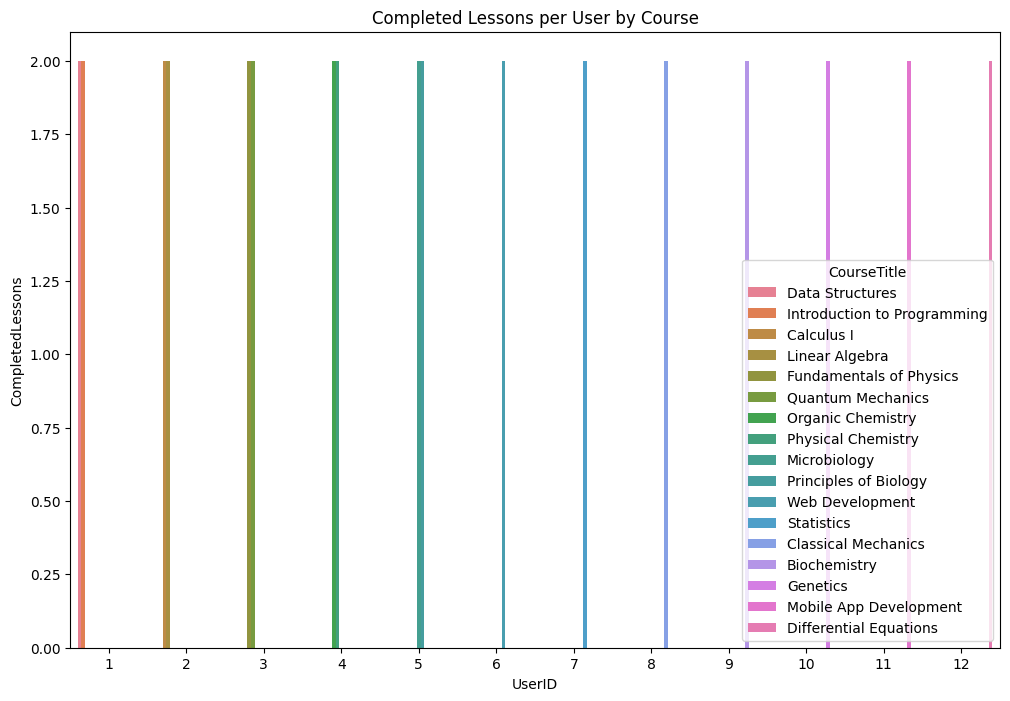

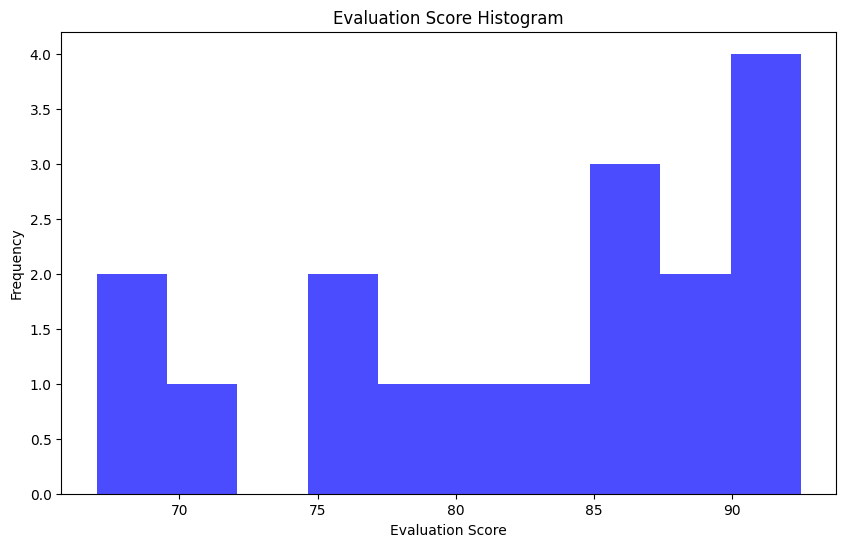

In [19]:
# Grouped bar chart User vs. Completed Lessons and Evaluation Scores
plt.figure(figsize=(12, 8))
sns.barplot(data=overallPerformance, x='UserID', y='CompletedLessons', hue='CourseTitle')
plt.title('Completed Lessons per User by Course')
plt.show()

# Histogram for Evaluation Score distribution
plt.figure(figsize=(10, 6))
pivot_eval = overallPerformance.pivot_table(values='EvaluationScore', index='UserID', columns='CourseTitle', aggfunc='mean')
pivot_eval_melted = pivot_eval.melt(var_name='CourseTitle', value_name='EvaluationScore').dropna()

plt.hist(pivot_eval_melted['EvaluationScore'], bins=10, color='blue', alpha=0.7)
plt.title('Evaluation Score Histogram')
plt.xlabel('Evaluation Score')
plt.ylabel('Frequency')
plt.show()

2- User Performance in Quizzes

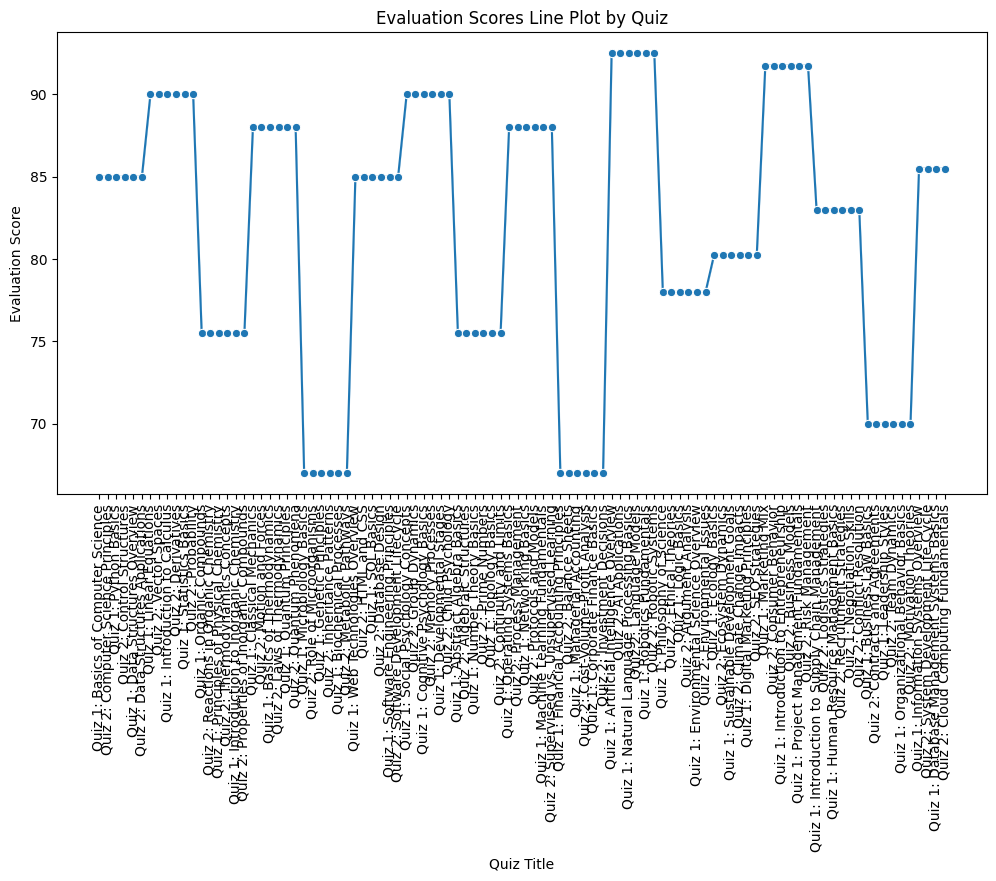

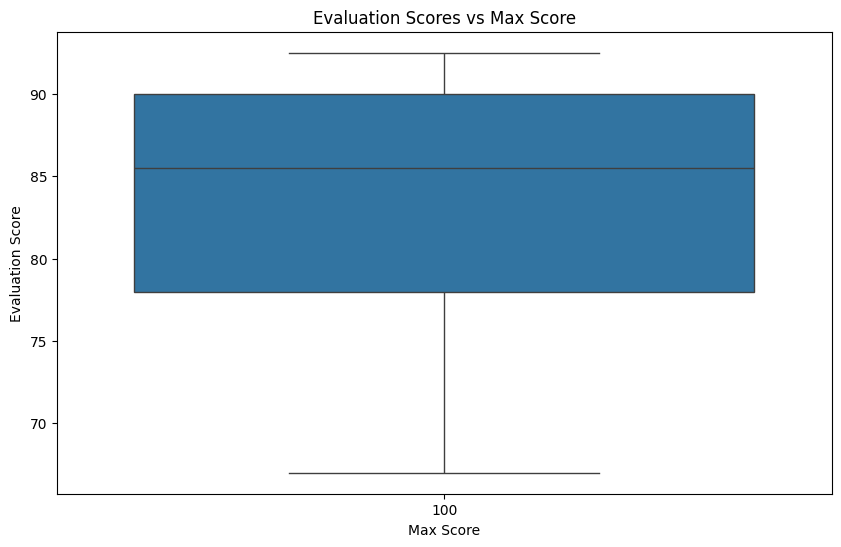

In [20]:
# Line plot for Evaluation Scores Distribution by Quiz
plt.figure(figsize=(12, 6))
sns.lineplot(data=quizPerformance, x='QuizTitle', y='EvaluationScore', marker='o')
plt.xticks(rotation=90)
plt.title('Evaluation Scores Line Plot by Quiz')
plt.xlabel('Quiz Title')
plt.ylabel('Evaluation Score')
plt.show()

# Boxplot for Evaluation Score vs Max Score
plt.figure(figsize=(10, 6))
sns.boxplot(x=quizPerformance['MaxScore'], y=quizPerformance['EvaluationScore'])
plt.title('Evaluation Scores vs Max Score')
plt.xlabel('Max Score')
plt.ylabel('Evaluation Score')
plt.show()


3- Assignment Completion and Deadlines

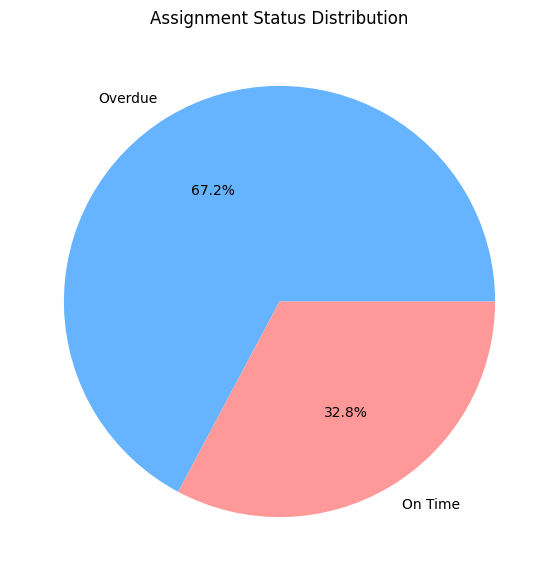

C:\Users\original\AppData\Local\Temp\ipykernel_12464\3481593464.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overdue_users.index, y=overdue_users.values, palette='Reds')


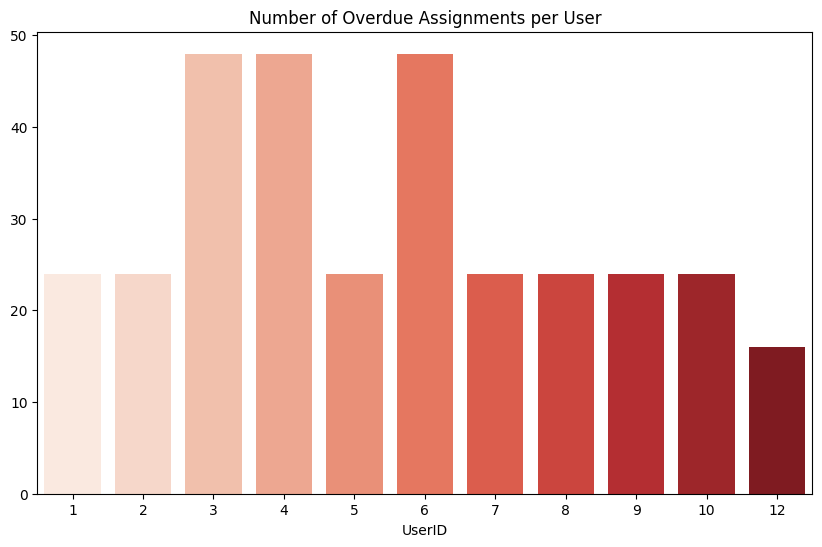

In [18]:
# Pie chart for Assignment Status
ass_status_counts = assCompletion['AssignmentStatus'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(ass_status_counts, labels=ass_status_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Assignment Status Distribution')
plt.show()

# Bar plot for Overdue Assignments by User
overdue_users = assCompletion[assCompletion['AssignmentStatus'] == 'Overdue']['UserID'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=overdue_users.index, y=overdue_users.values, palette='Reds')
plt.title('Number of Overdue Assignments per User')
plt.show()


4- Certificates Issued per Course

C:\Users\original\AppData\Local\Temp\ipykernel_12836\1313180303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=certIssue, x='CourseTitle', y='CertificatesIssued', palette='Greens')


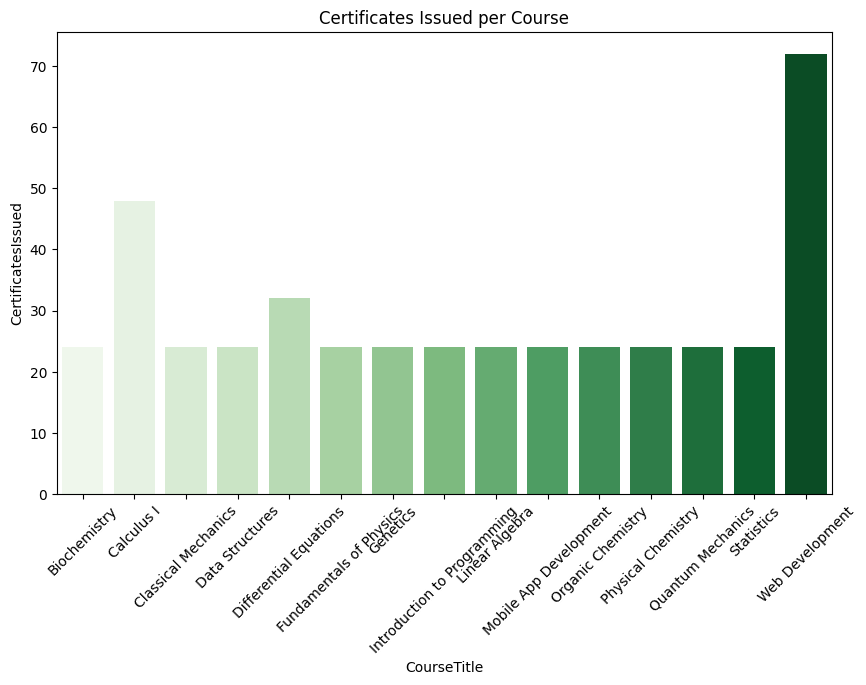

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=certIssue, x='CourseTitle', y='CertificatesIssued', palette='Greens')
plt.xticks(rotation=45)
plt.title('Certificates Issued per Course')
plt.show()


5- Evaluation Score Distribution

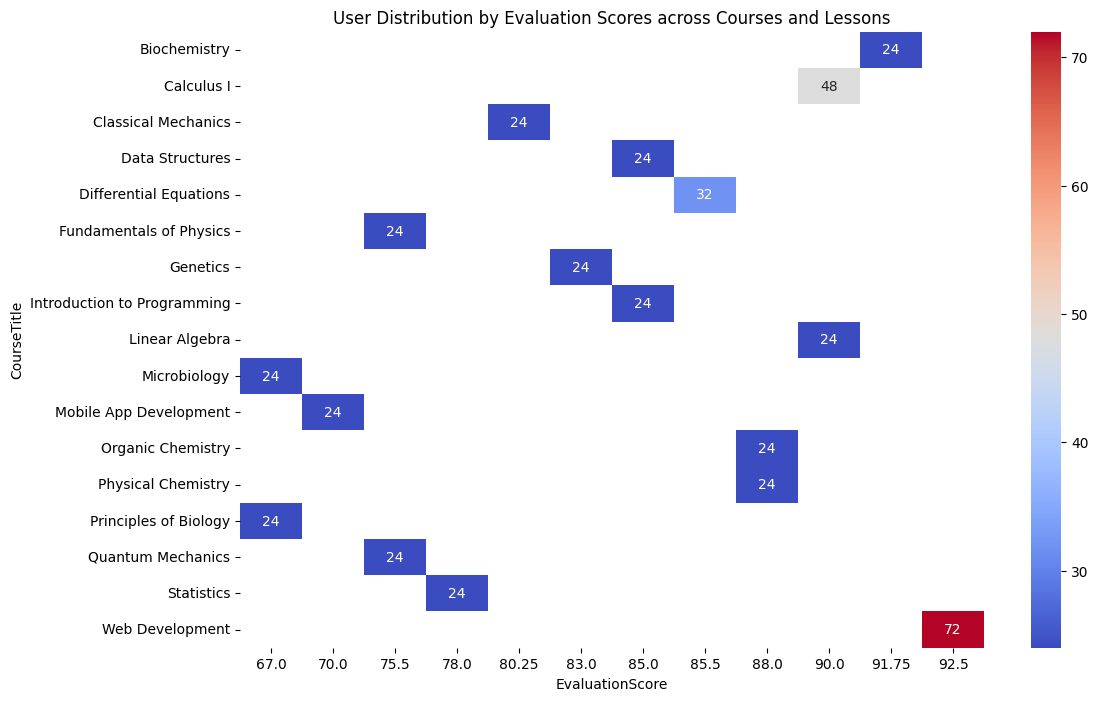

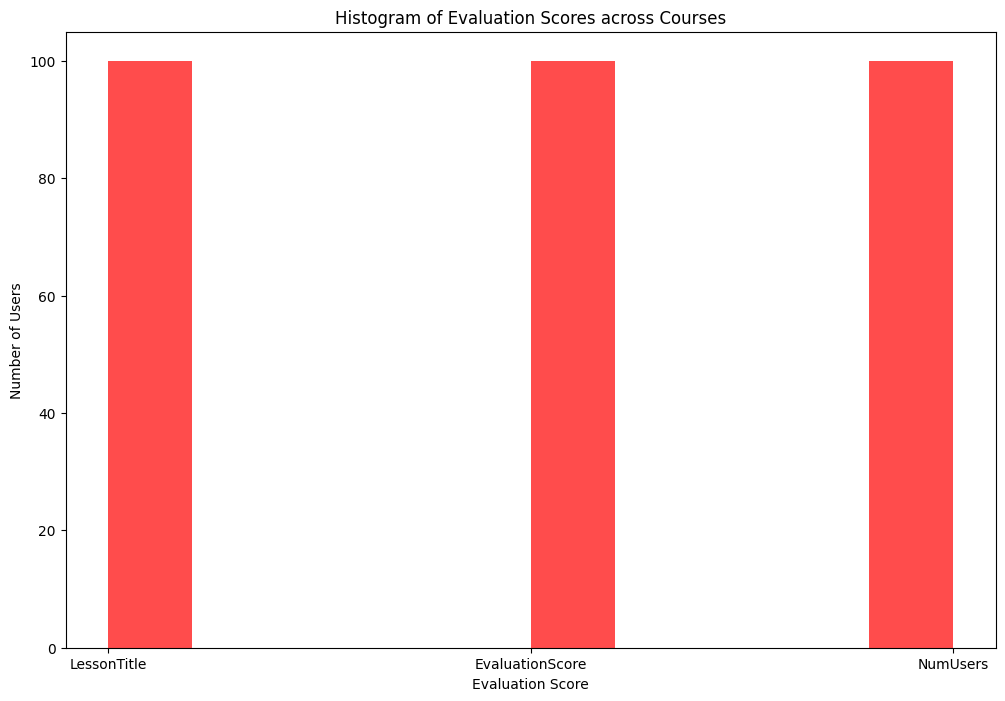

In [24]:
pivot_eval_distribution = evalDistribution.pivot_table(values='NumUsers', index='CourseTitle', columns='EvaluationScore', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_eval_distribution, annot=True, cmap='coolwarm', fmt='g')
plt.title('User Distribution by Evaluation Scores across Courses and Lessons')
plt.show()

# Histogram for User Distribution by Evaluation Scores across Courses and Lessons
plt.figure(figsize=(12, 8))
eval_dist_melted = evalDistribution.melt(id_vars=['CourseTitle'], value_name='UsersCount', var_name='EvaluationScore').dropna()

plt.hist(eval_dist_melted['EvaluationScore'], bins=10, color='red', alpha=0.7)
plt.title('Histogram of Evaluation Scores across Courses')
plt.xlabel('Evaluation Score')
plt.ylabel('Number of Users')
plt.show()

6- User Engagement

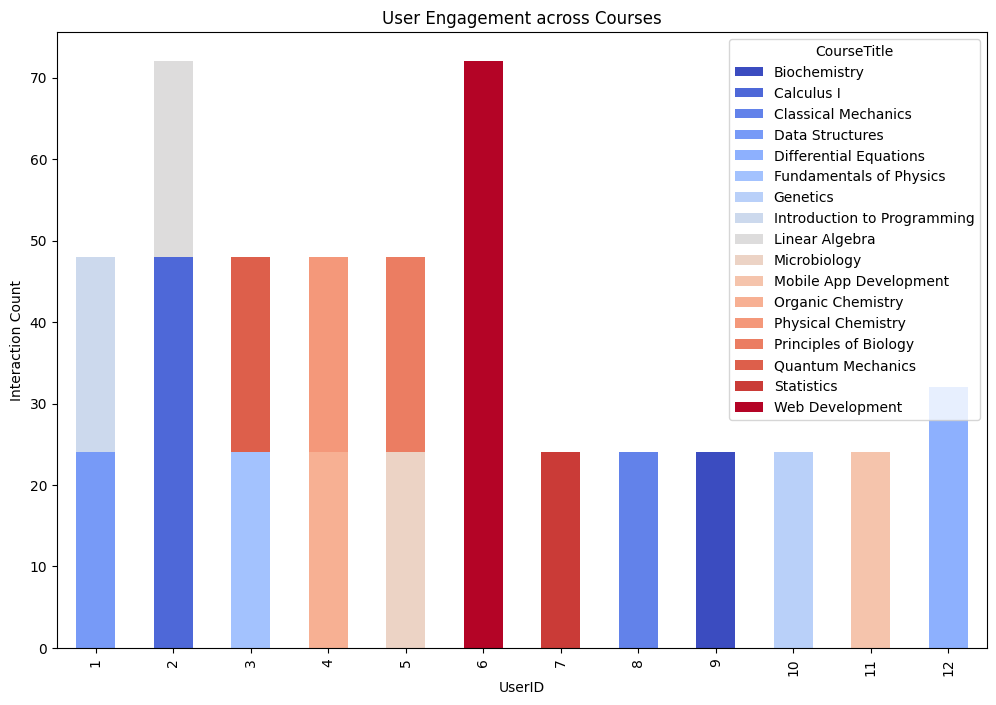

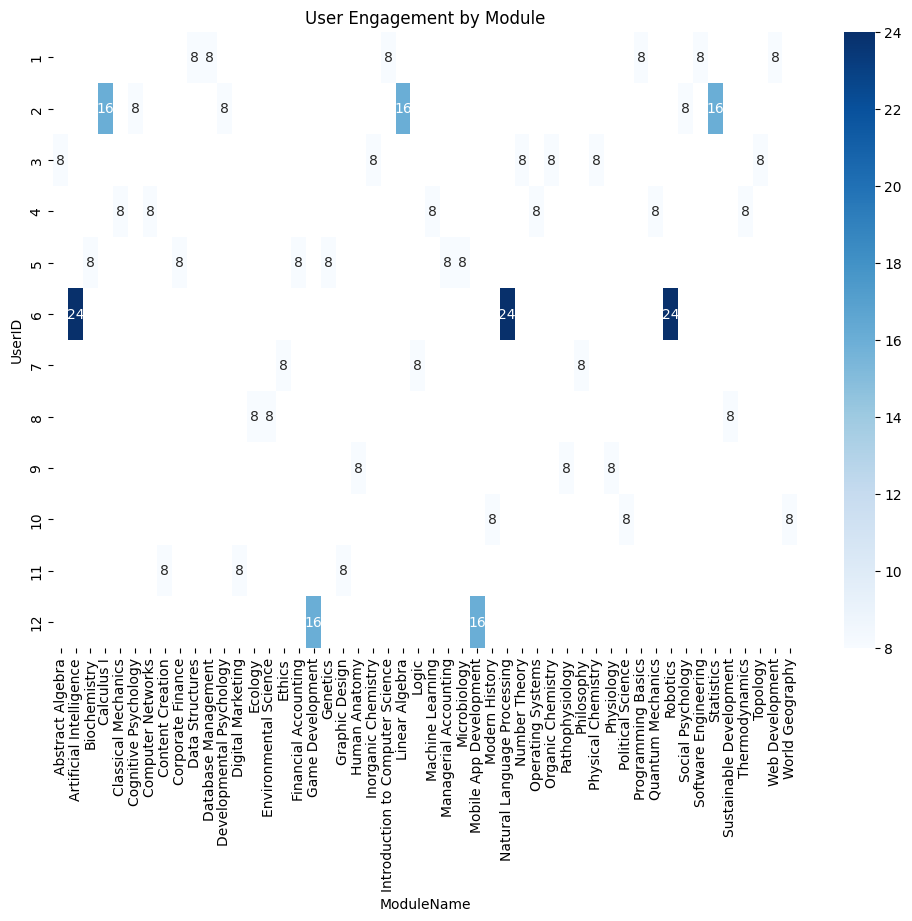

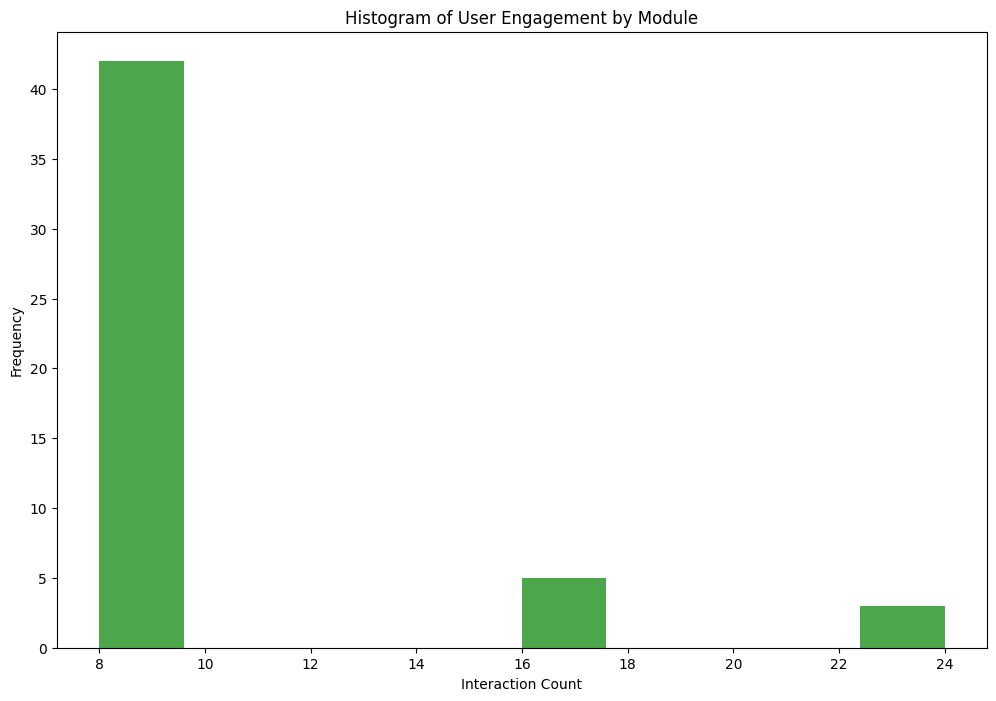

In [35]:
user_course_engagement = userEngagment.groupby(['UserID', 'CourseTitle'])['InteractionCount'].sum().unstack()
user_course_engagement.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('User Engagement across Courses')
plt.ylabel('Interaction Count')
plt.show()

# Heatmap for Module Engagement
pivot_module_engagement = userEngagment.pivot_table(values='InteractionCount', index='UserID', columns='ModuleName', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_module_engagement, annot=True, cmap='Blues')
plt.title('User Engagement by Module')
plt.show()

# Histogram for Module Engagement
plt.figure(figsize=(12, 8))
pivot_module_engagement_melted = pivot_module_engagement.melt(var_name='ModuleName', value_name='InteractionCount').dropna()

plt.hist(pivot_module_engagement_melted['InteractionCount'], bins=10, color='green', alpha=0.7)
plt.title('Histogram of User Engagement by Module')
plt.xlabel('Interaction Count')
plt.ylabel('Frequency')
plt.show()

**Churn Analysis**

1- Churned Users Based on Inactivity

In [83]:
# Define a threshold for churn 
query_churn = """
SELECT 
    U.UserID,
    COUNT(DISTINCT F.LessonID) AS CompletedLessons,
    AVG(F.EvaluationScore) AS AvgEvaluationScore,
    COUNT(DISTINCT F.ModuleID) AS ModulesCompleted,
    COUNT(DISTINCT F.QuizID) AS QuizzesCompleted,
    SUM(CASE WHEN F.CertificateIssued = 1 THEN 1 ELSE 0 END) AS CertificatesIssued,
    COUNT(DISTINCT F.AssignmentID) AS AssignmentsCompleted,
    CASE 
        WHEN MAX(F.CreatedAt) < DATEADD(DAY, -30, GETDATE()) THEN 1
        ELSE 0 
    END AS Inactive,
    CASE
        WHEN AVG(F.EvaluationScore) < 80 THEN 1
        ELSE 0
    END AS LowPerformance, 
    CASE
        WHEN COUNT(DISTINCT F.LessonID) < 7 THEN 1 
        ELSE 0
    END AS LowEngagement 
FROM FactUserProgress F
JOIN dimUsers U ON F.UserID = U.UserID
GROUP BY U.UserID;
"""
churned_users = pd.read_sql(query_churn, conn)
churned_users['LowEngagement'] = churned_users['LowEngagement'].astype(int)
churn_counts = churned_users['LowEngagement'].value_counts()


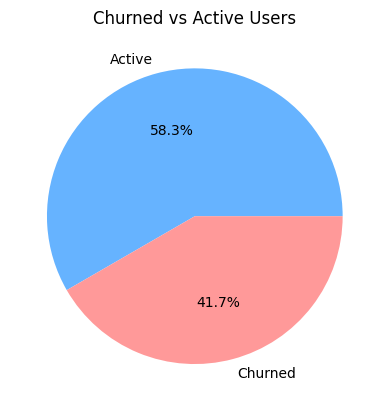

In [85]:
# Ensure labels match the number of categories in churn_counts
labels = ['Active', 'Churned'] if len(churn_counts) == 2 else churn_counts.index.tolist()

plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Churned vs Active Users')
plt.show()

2- User Engagement and Progress

In [86]:
query_churn2 = """
SELECT 
    U.UserID,
    COUNT(DISTINCT F.LessonID) AS CompletedLessons,
    AVG(F.EvaluationScore) AS AvgEvaluationScore,
    SUM(CASE WHEN F.CertificateIssued = 1 THEN 1 ELSE 0 END) AS CertificatesIssued
FROM FactUserProgress F
JOIN dimUsers U ON F.UserID = U.UserID
GROUP BY U.UserID;
"""
user_engagement = pd.read_sql(query_churn2, conn)

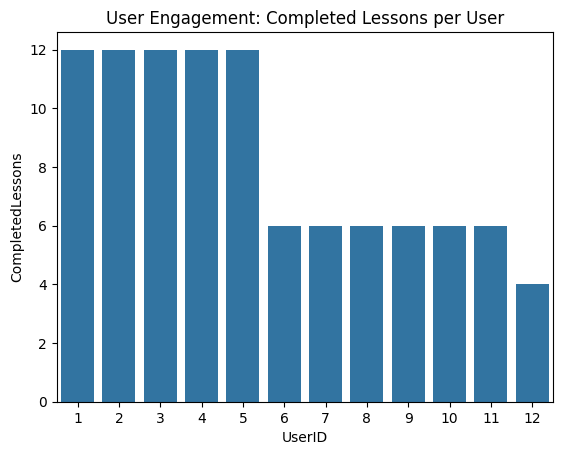

In [87]:
sns.barplot(x='UserID', y='CompletedLessons', data=user_engagement)
plt.title('User Engagement: Completed Lessons per User')
plt.show()

3- Analyze Churn by Course

In [119]:
query_churn3 = """
WITH LastInteraction AS (
    SELECT 
        F.UserID,
        F.CourseID,
        MAX(F.CreatedAt) AS LastInteractionDate
    FROM FactUserProgress F
    GROUP BY F.UserID, F.CourseID
)

SELECT 
    C.CourseTitle,
    SUM(CASE 
            WHEN LI.LastInteractionDate < DATEADD(DAY, -30, GETDATE()) THEN 1 
            ELSE 0 
        END) AS ChurnedUsers,
    COUNT(DISTINCT U.UserID) AS TotalUsers,
    (SUM(CASE 
            WHEN LI.LastInteractionDate < DATEADD(DAY, -30, GETDATE()) THEN 1 
            ELSE 0 
        END) * 100.0) / COUNT(DISTINCT U.UserID) AS ChurnRate
FROM LastInteraction LI
JOIN dimCourse C ON LI.CourseID = C.CourseID
JOIN dimUsers U ON LI.UserID = U.UserID
GROUP BY C.CourseTitle;
"""
churn_by_course = pd.read_sql(query_churn3, conn)
churn_by_course

,CourseTitle,ChurnedUsers,TotalUsers,ChurnRate
0,Biochemistry,0,1,0.0
1,Calculus I,0,1,0.0
2,Classical Mechanics,0,1,0.0
3,Data Structures,0,1,0.0
4,Differential Equations,0,1,0.0
5,Fundamentals of Physics,0,1,0.0
6,Genetics,0,1,0.0
7,Introduction to Programming,0,1,0.0
8,Linear Algebra,0,1,0.0
9,Microbiology,0,1,0.0


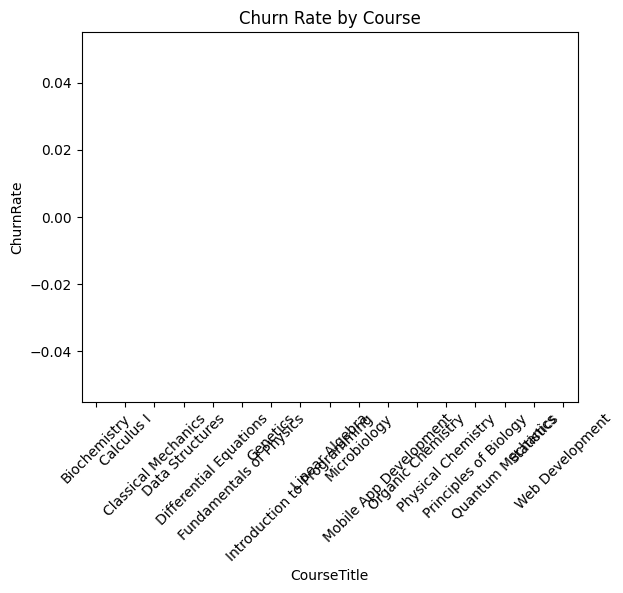

In [89]:
sns.barplot(x='CourseTitle', y='ChurnRate', data=churn_by_course)
plt.xticks(rotation=45)
plt.title('Churn Rate by Course')
plt.show()

# ML Models

**Churn Prediction Features**

In [53]:
userProgressDF.head()

,FactID,UserID,CourseID,ModuleID,LessonID,QuizID,AssignmentID,ProgressStatus,EvaluationScore,CertificateIssued,EvaluationID,CreatedAt
0,1,1,1,1,1,1,1,Completed,85.0,True,1,2024-10-22 16:58:39.700
1,2,1,1,1,1,1,2,Completed,85.0,True,1,2024-10-22 16:58:39.700
2,3,1,1,1,1,2,1,Completed,85.0,True,1,2024-10-22 16:58:39.700
3,4,1,1,1,1,2,2,Completed,85.0,True,1,2024-10-22 16:58:39.700
4,5,1,1,1,2,1,1,Completed,85.0,True,1,2024-10-22 16:58:39.700


In [120]:
query_features = """
SELECT 
    U.UserID,
    COUNT(DISTINCT F.LessonID) AS CompletedLessons,
    AVG(F.EvaluationScore) AS AvgEvaluationScore,
    COUNT(DISTINCT F.ModuleID) AS ModulesCompleted,
    COUNT(DISTINCT F.QuizID) AS QuizzesCompleted,
    SUM(CASE WHEN F.CertificateIssued = 1 THEN 1 ELSE 0 END) AS CertificatesIssued,
    COUNT(DISTINCT F.AssignmentID) AS AssignmentsCompleted,
    CASE 
        WHEN MAX(F.CreatedAt) < DATEADD(DAY, -30, GETDATE()) THEN 1
        ELSE 0 
    END AS Inactive,
    CASE
        WHEN AVG(F.EvaluationScore) < 80 THEN 1
        ELSE 0
    END AS LowPerformance, 
    CASE
        WHEN COUNT(DISTINCT F.LessonID) < 7 THEN 1 
        ELSE 0
    END AS LowEngagement 
FROM FactUserProgress F
JOIN dimUsers U ON F.UserID = U.UserID
GROUP BY U.UserID;
"""
data = pd.read_sql(query_features, conn)
data

,UserID,CompletedLessons,AvgEvaluationScore,ModulesCompleted,QuizzesCompleted,CertificatesIssued,AssignmentsCompleted,Inactive,LowPerformance,LowEngagement
0,1,12,85.00,6,12,48,12,0,0,0
1,2,12,90.00,6,12,72,12,0,0,0
2,3,12,75.50,6,12,48,12,0,1,0
3,4,12,88.00,6,12,48,12,0,0,0
4,5,12,67.00,6,12,0,12,0,1,0
5,6,6,92.50,3,6,72,6,0,0,1
6,7,6,78.00,3,6,24,6,0,1,1
7,8,6,80.25,3,6,24,6,0,0,1
8,9,6,91.75,3,6,24,6,0,0,1
9,10,6,83.00,3,6,24,6,0,0,1


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [122]:
X = data.drop(columns=['UserID', 'LowPerformance'])
y = data['LowPerformance']

In [123]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Models Training and Evaluation**

1. Logistic Regression

In [124]:
# Initializing the Logistic Regression model
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

y_pred_test = log_model.predict(X_test)

y_pred_train = log_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Train Accuracy: 1.00
Test Accuracy: 1.00
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



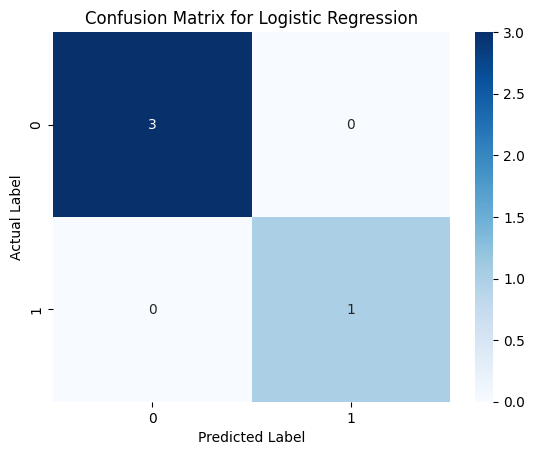

In [125]:
# Confusion Matrix
conf_matrix_log = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

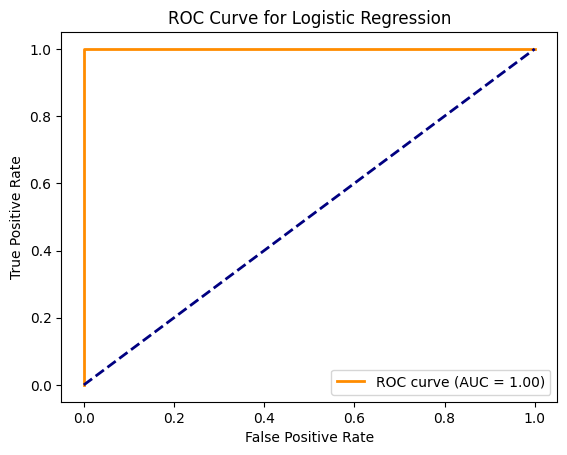

In [126]:
# Get the probabilities for ROC curve 
y_pred_prob_log = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_log)
auc_log = roc_auc_score(y_test, y_pred_prob_log)

# Plot ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


2. Random Forest

In [127]:
# Initializing the Random Forest model
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print(classification_report(y_test, y_pred_rf))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



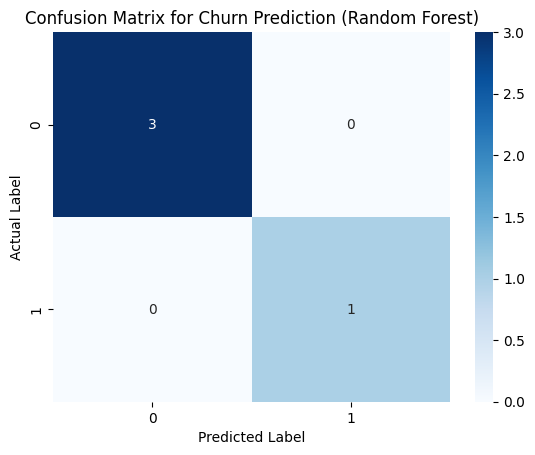

In [128]:
# Confusion matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Churn Prediction (Random Forest)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

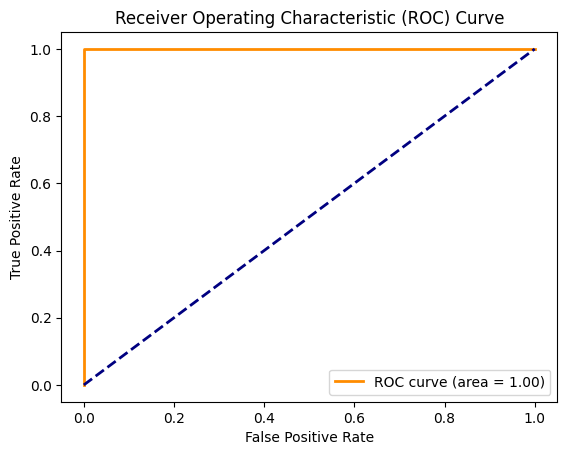

In [129]:
# Get the probabilities for ROC
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

3. XGBoost

In [130]:
import xgboost as xgb
from xgboost import plot_importance

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # For binary classification
    'max_depth': 6,                  # Maximum depth of the trees
    'learning_rate': 0.1,            # Step size (eta)
    'n_estimators': 100,             # Number of trees
    'eval_metric': 'logloss',        # Evaluation metric (logistic loss)
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

y_pred_prob_xgb = xgb_model.predict(dtest)
y_pred_xgb = [1 if prob > 0.5 else 0 for prob in y_pred_prob_xgb]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\original\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:07:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\original\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\original\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

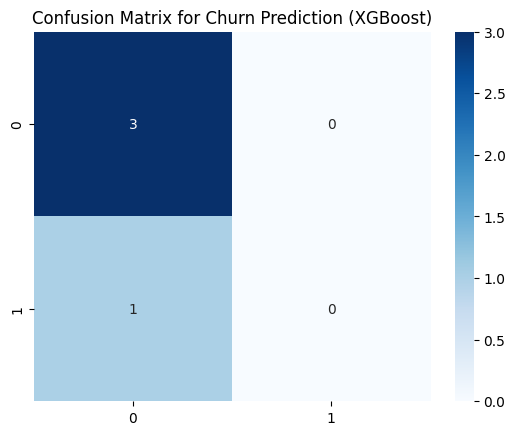

In [131]:
# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Churn Prediction (XGBoost)')
plt.show()